In [366]:
#import libraries here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np

%matplotlib inline

In [25]:
#read data to DataFrame
wine_main = pd.read_csv('winemag-data-130k-v2.csv')

#shape
print(wine_main.shape)

wine_main.head()


(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


region_2                 61.14
designation              28.83
taster_twitter_handle    24.02
taster_name              20.19
region_1                 16.35
price                     6.92
province                  0.05
country                   0.05
variety                   0.00
winery                    0.00
title                     0.00
points                    0.00
description               0.00
Unnamed: 0                0.00
dtype: float64

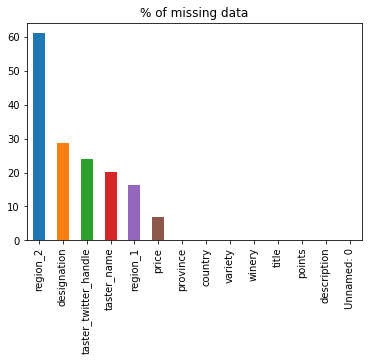

In [26]:
#identify missing data by column
missing_by_columns = wine_main.isnull().mean().sort_values(ascending=False).round(4)*100
missing_by_columns.plot(kind='bar')
plt.title("% of missing data")
missing_by_columns

Among the columns with the most missing values are region_2 (%61), designation (%29), taster_twitter_handle (%24) and taster_name (%20). I decided to drop this column. The missing values in region_1 can simply mean that there is no region which can give important information.

In [27]:
#drop region_2, designation, taster_twitter_handle, taster_name
wine_clmn_reduced = wine_main.drop(columns=["region_2", "designation", "taster_twitter_handle", "taster_name"])
wine_clmn_reduced.head()

,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [38]:
#missing by rows
#drop rows with missing price
wine_row_reduced = wine_clmn_reduced.dropna(subset=['price'], how='any')
print(wine_row_reduced.shape)
wine_row_reduced.head()

(120975, 10)


,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [31]:
#check missing values by column again
wine_row_reduced.isnull().sum().sort_values(ascending=False)

region_1       19575
province          59
country           59
variety            1
winery             0
title              0
price              0
points             0
description        0
Unnamed: 0         0
dtype: int64

In [50]:
#Since country is one of the most important attribute to predict price. We will drop 59 rows with missing country. 
wine_row_reduced = wine_row_reduced.dropna(subset=['country','variety'], how='any')
#check missing values by column again
print("Number of rows, columns:", (wine_row_reduced.shape[0], wine_row_reduced.shape[1]))
wine_row_reduced.isnull().sum().sort_values(ascending=False)


Number of rows, columns: (120915, 10)


region_1       19515
winery             0
variety            0
title              0
province           0
price              0
points             0
description        0
country            0
Unnamed: 0         0
dtype: int64

In [42]:
#identify categorical attributes
wine_row_reduced.dtypes

Unnamed: 0       int64
country         object
description     object
points           int64
price          float64
province        object
region_1        object
title           object
variety         object
winery          object
dtype: object

There are 8 object type attributes, we can one hot encode country, province, region_1, title, variety and winery

Let's use the simple example to study how to join the reviews with similar titles and take a mean for its numerical values

In [170]:
df = pd.DataFrame({'index':[1,2,3], 'title': ['w1', 'w1', 'w2'], 'price': [3, 4, 4], 'country': ['US','US','UK'], 'review': ['good', 'flavor', 'berry']})
df


,index,title,price,country,review
0,1,w1,3,US,good
1,2,w1,4,US,flavor
2,3,w2,4,UK,berry


In [171]:
df2 = df.groupby('title').agg(dict(price = 'mean', country = 'first', review = list) ).reset_index()
df2

,title,price,country,review
0,w1,3.5,US,"[good, flavor]"
1,w2,4.0,UK,[berry]


Now, let's apply the similar operations to our wine database. I will group by wine by title, take mean value for the price and points, take the first entry for country, province, region_1, variety and winery (because all this attributes supposed to be the same for given title), and I will joint descriptions together making a list of available reviews for given wine.

In [173]:
#Lets group by wines by title
wine_groupped = wine_row_reduced.groupby('title').agg(dict(country = 'first', description = list, points = 'mean', price = 'mean', province='first', region_1 = 'first', variety = 'first', winery = 'first')).reset_index()
wine_groupped

,title,country,description,points,price,province,region_1,variety,winery
0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),Spain,[The previous two years we did not find this w...,82.0,18.0,Catalonia,Penedès,Cabernet Sauvignon,1+1=3
1,1+1=3 NV Brut Sparkling (Cava),Spain,[Spiced apple and toast aromas are clean and d...,87.0,16.0,Catalonia,Cava,Sparkling Blend,1+1=3
2,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Spain,"[Clean, fresh apple aromas and a minerally, ci...",89.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3
3,1+1=3 NV Rosé Sparkling (Cava),Spain,"[A dusty, yeasty nose is simplistic but friend...",86.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3
4,10 Knots 2006 Beachcomber White (Paso Robles),US,"[A Rhône blend of Viognier, Roussanne and Mars...",83.0,21.0,California,Paso Robles,Rhône-style White Blend,10 Knots
5,10 Knots 2006 Chardonnay (Santa Barbara County),US,[Oaky influences give this wine a candied tast...,85.0,21.0,California,Santa Barbara County,Chardonnay,10 Knots
6,10 Knots 2009 Moonraker Grenache (Paso Robles),US,"[Hot in alcohol, simple in everything else, th...",81.0,35.0,California,Paso Robles,Grenache,10 Knots
7,10 Knots 2010 Viognier (Paso Robles),US,"[A strongly flavored, sugary, unsubtle wine, l...",84.0,22.0,California,Paso Robles,Viognier,10 Knots
8,100 Percent Wine 2012 All Profits to Charity R...,US,"[Juicy and fresh, this deeply colored wine off...",89.0,18.0,California,California,Red Blend,100 Percent Wine
9,100 Percent Wine 2014 All Profits to Charity S...,US,"[Herbaceous in aroma, dry and lean on the pala...",84.0,18.0,California,California,Sauvignon Blanc,100 Percent Wine


Fist question that I am interested in:

**1. What countries are the major producers of the wine and what sorts of wine have the best rating in those countries?**

In [235]:
countries = wine_groupped['country'].value_counts(ascending=False)
countries

US                        50012
France                    15817
Italy                     15407
Spain                      5954
Portugal                   4475
Chile                      4123
Argentina                  3500
Austria                    2527
Australia                  2155
Germany                    1949
New Zealand                1238
South Africa               1195
Israel                      453
Greece                      424
Canada                      224
Bulgaria                    132
Hungary                     128
Romania                     101
Uruguay                      98
Turkey                       80
Georgia                      74
Slovenia                     70
Croatia                      68
Mexico                       68
England                      59
Moldova                      56
Brazil                       44
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Czech Re

We will create barplot of major wine producers that produce more than 1000 different wines

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa'],
      dtype='object')


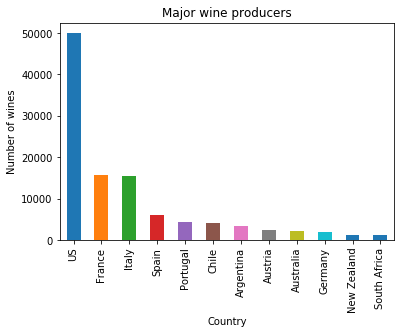

In [300]:
countries[:12].plot(kind='bar')
plt.title("Major wine producers")
plt.ylabel("Number of wines")
plt.xlabel("Country")
major_countries = countries[:12].index
print(major_countries)

In [461]:
wine_groupped['counts'] = 0
country_variety_counts =  wine_groupped.groupby(['country', 'variety']).agg(dict(counts = 'count', points = 'median')).sort_values(by='counts', ascending=False).reset_index()
country_variety_counts[:10]

,country,variety,counts,points
0,US,Pinot Noir,9121,90.0
1,US,Cabernet Sauvignon,6780,89.0
2,US,Chardonnay,6235,88.0
3,US,Syrah,2998,90.0
4,Italy,Red Blend,2996,89.0
5,France,Bordeaux-style Red Blend,2895,88.0
6,US,Red Blend,2716,88.0
7,US,Zinfandel,2515,88.0
8,US,Merlot,2133,87.0
9,Italy,Nebbiolo,2093,90.0


First, I will analyze US wines and then apply similar analysis to  other first 12 popular countries.
I will choose 10 most popular sorts (variety) and obtain mean points for it.

In [479]:
us = country_variety_counts.loc[country_variety_counts['country']=='US'][:10]
variety_list = us['variety'].values
variety_list

array(['Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay', 'Syrah',
       'Red Blend', 'Zinfandel', 'Merlot', 'Sauvignon Blanc',
       'Bordeaux-style Red Blend', 'Riesling'], dtype=object)

In [430]:
wine_groupped[wine_groupped['variety'].isin(variety_list)][wine_groupped['country']=='US']

/Users/maxim/miniconda/envs/Python_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,country,description,points,price,province,region_1,variety,winery,counts
5,10 Knots 2006 Chardonnay (Santa Barbara County),US,[Oaky influences give this wine a candied tast...,85.0,21.0,California,Santa Barbara County,Chardonnay,10 Knots,0
8,100 Percent Wine 2012 All Profits to Charity R...,US,"[Juicy and fresh, this deeply colored wine off...",89.0,18.0,California,California,Red Blend,100 Percent Wine,0
9,100 Percent Wine 2014 All Profits to Charity S...,US,"[Herbaceous in aroma, dry and lean on the pala...",84.0,18.0,California,California,Sauvignon Blanc,100 Percent Wine,0
11,1000 Stories 2013 Bourbon Barrel Aged Zinfande...,US,[This approachable wine from the Fetzer organi...,91.0,19.0,California,Mendocino,Zinfandel,1000 Stories,0
12,1000 Stories 2014 Bourbon Barrel Aged Batch No...,US,[Exotically fruity with an enticing floral cha...,90.0,19.0,California,California,Zinfandel,1000 Stories,0
13,1070 Green 2011 Sauvignon Blanc (Rutherford),US,"[Flavors of green hay, tart juniper berry and ...",88.0,25.0,California,Rutherford,Sauvignon Blanc,1070 Green,0
14,10Span 2011 Pinot Noir (Santa Barbara County),US,[Some overripe and green notes dilute the cher...,83.0,15.0,California,Santa Barbara County,Pinot Noir,10Span,0
15,10Span 2012 Chardonnay (Santa Barbara County),US,"[Pretty standard Chardonnay, with a creamy tex...",83.0,13.0,California,Santa Barbara County,Chardonnay,10Span,0
17,10Span 2013 Pinot Noir (Central Coast),US,[Very perfumed aromas of violets and Hawaiian ...,83.0,7.0,California,Central Coast,Pinot Noir,10Span,0
26,12C Wines 2012 Beckstoffer Vineyard Georges I...,US,[A 100% varietal wine from a prime Beckstoffer...,90.0,75.0,California,Rutherford,Cabernet Sauvignon,12C Wines,0


/Users/maxim/miniconda/envs/Python_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


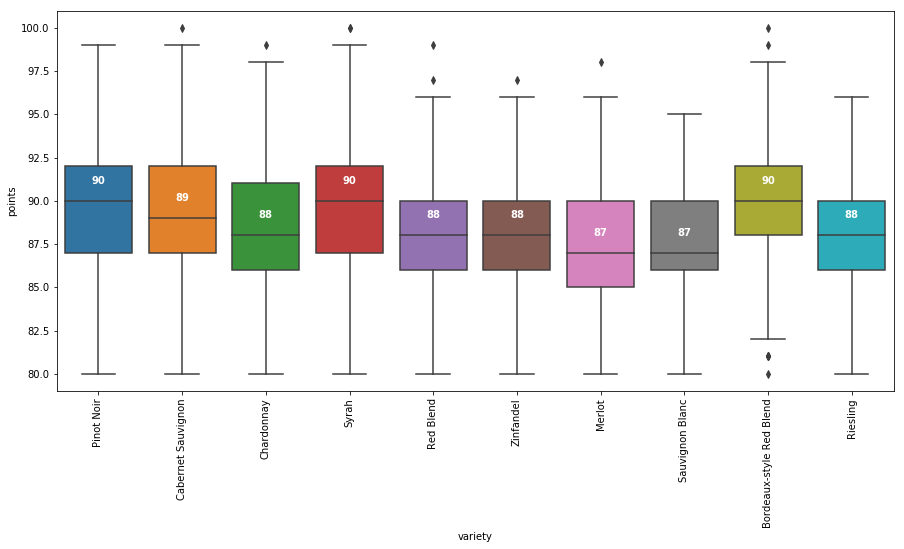

In [480]:
df = wine_groupped[wine_groupped['variety'].isin(variety_list)][wine_groupped['country']=='US']

fig, ax = plt.subplots(figsize = (15,7))
chart = sns.boxplot(x='variety',y='points', data=df, ax = ax, order=variety_list)

medians = us['points'].values
median_labels = [str(int(s)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 1.0, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
plt.xticks(rotation = 90)
plt.show()

In [301]:
country_variety2 = wine_groupped.groupby(['country', 'variety'])['points'].mean()
country_variety2

country    variety                          
Argentina  Barbera                              85.000000
           Bonarda                              86.387755
           Bordeaux-style Red Blend             89.911392
           Bordeaux-style White Blend           83.000000
           Cabernet Blend                       88.250000
           Cabernet Franc                       89.357143
           Cabernet Franc-Cabernet Sauvignon    88.666667
           Cabernet Franc-Malbec                91.000000
           Cabernet Sauvignon                   86.023762
           Cabernet Sauvignon-Cabernet Franc    84.000000
           Cabernet Sauvignon-Malbec            87.363636
           Cabernet Sauvignon-Merlot            87.000000
           Cabernet Sauvignon-Shiraz            85.333333
           Cabernet Sauvignon-Syrah             86.000000
           Cabernet-Malbec                      86.000000
           Cabernet-Syrah                       88.000000
           Champagne Blend 

In [305]:
country_variety2['US'].sort_values(ascending=False)

variety
Moscato Giallo                    94.000000
Syrah-Petit Verdot                94.000000
Riesling-Chardonnay               94.000000
Tannat-Syrah                      93.000000
Touriga Nacional Blend            93.000000
Tempranillo-Cabernet Sauvignon    92.000000
Malbec-Cabernet Sauvignon         92.000000
White Port                        92.000000
Sauvignon Gris                    92.000000
Chardonnay-Albariño               91.500000
Tempranillo-Syrah                 91.000000
Viognier-Grenache Blanc           91.000000
Black Monukka                     91.000000
Malbec-Tannat                     91.000000
Roussanne-Grenache Blanc          91.000000
Monastrell                        91.000000
Muskat                            91.000000
Ugni Blanc                        90.666667
Grenache-Carignan                 90.500000
Mourvèdre-Syrah                   90.500000
Grenache Noir                     90.500000
Pinot Noir-Syrah                  90.500000
Syrah-Tempranillo       